# K-Means Clustering

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

We don't have independent variables and the last column is not our dependent variables
The first column (customer id) has no effect on data and isn't relevent to the result
We only pick the column that we want to learn some pattern in our model. here 4th and 5th)

we also don't need to split our data to training set and test set since we don't have dependent and independent variables.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

We will run k_means algorithm a couple of times with different number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

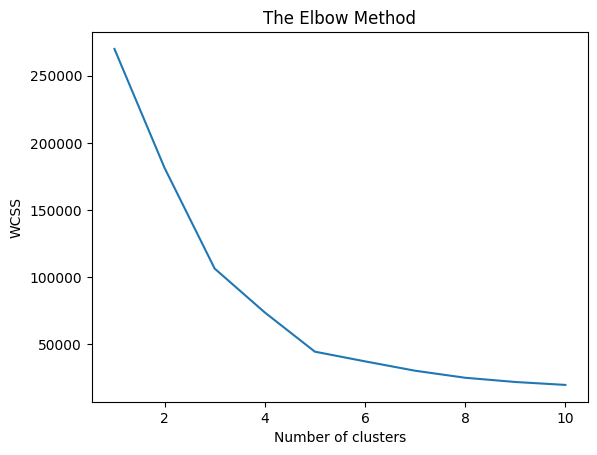

In [3]:
from sklearn.cluster import KMeans
wcss = []
# in the Elbow method we had a range for different number of clusters
for i in range(1, 11): # we want to include 10 as well
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42) # init for initialization trap
  # any number for random_state is correct
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  # kmeans.inertia_ refers to the sum of squared distances of samples to their closest cluster center
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


the optimal number of cluster is 5 because after that we have a significant
increment in the WSCC value

## Training the K-Means model on the dataset

We will see 5 different values according to 5 different clusters

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state= 10)
# I changed the random_state to 10 to get the same value for y_kmeans according
# to the lecture
# create the dependent variable
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

X[y_kmeans ==0, 0]: it means that from matrix X choose the customer with y_kmeans equal to 0 for the first column of output (4th)

X[y_kmeans ==0, 1]: it means that from matrix X choose the customer with y_kmeans equal to 0 for the second column of output (5th)

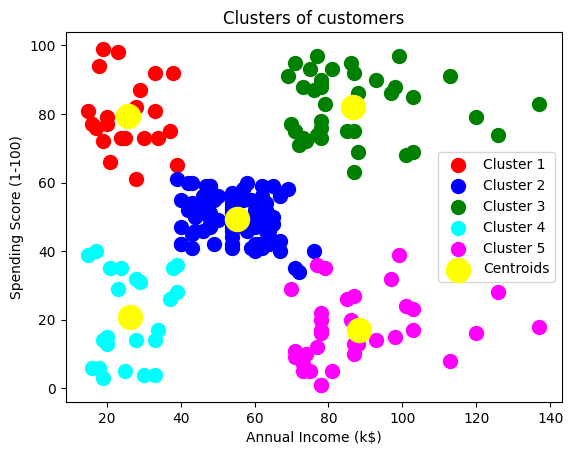

In [11]:
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans ==1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans ==2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans ==3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans ==4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label =
            'Centroids') # x and y coordinate of centroid
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
